In [1]:
#Imporitng the neccessary libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
#Importing the dataset 
df = pd.read_csv(r"C:\Users\HP\Downloads\transactions.csv")

In [3]:
df.head()

,transaction_id,user_id,account_age_days,total_transactions_user,avg_amount_user,amount,country,bin_country,channel,merchant_category,promo_used,avs_match,cvv_result,three_ds_flag,transaction_time,shipping_distance_km,is_fraud
0,1,1,141,47,147.93,84.75,FR,FR,web,travel,0,1,1,1,2024-01-06T04:09:39Z,370.95,0
1,2,1,141,47,147.93,107.90,FR,FR,web,travel,0,0,0,0,2024-01-09T20:13:47Z,149.62,0
2,3,1,141,47,147.93,92.36,FR,FR,app,travel,1,1,1,1,2024-01-12T06:20:11Z,164.08,0
3,4,1,141,47,147.93,112.47,FR,FR,web,fashion,0,1,1,1,2024-01-15T17:00:04Z,397.40,0
4,5,1,141,47,147.93,132.91,FR,US,web,electronics,0,1,1,1,2024-01-17T01:27:31Z,935.28,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299695 entries, 0 to 299694
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   transaction_id           299695 non-null  int64  
 1   user_id                  299695 non-null  int64  
 2   account_age_days         299695 non-null  int64  
 3   total_transactions_user  299695 non-null  int64  
 4   avg_amount_user          299695 non-null  float64
 5   amount                   299695 non-null  float64
 6   country                  299695 non-null  object 
 7   bin_country              299695 non-null  object 
 8   channel                  299695 non-null  object 
 9   merchant_category        299695 non-null  object 
 10  promo_used               299695 non-null  int64  
 11  avs_match                299695 non-null  int64  
 12  cvv_result               299695 non-null  int64  
 13  three_ds_flag            299695 non-null  int64  
 14  tran

In [5]:
df.isna().sum()

transaction_id             0
user_id                    0
account_age_days           0
total_transactions_user    0
avg_amount_user            0
amount                     0
country                    0
bin_country                0
channel                    0
merchant_category          0
promo_used                 0
avs_match                  0
cvv_result                 0
three_ds_flag              0
transaction_time           0
shipping_distance_km       0
is_fraud                   0
dtype: int64

In [6]:
#Now we can look into the categorical columns
df.dtypes

transaction_id               int64
user_id                      int64
account_age_days             int64
total_transactions_user      int64
avg_amount_user            float64
amount                     float64
country                     object
bin_country                 object
channel                     object
merchant_category           object
promo_used                   int64
avs_match                    int64
cvv_result                   int64
three_ds_flag                int64
transaction_time            object
shipping_distance_km       float64
is_fraud                     int64
dtype: object

In [7]:
df['country'].unique()

array(['FR', 'US', 'TR', 'PL', 'ES', 'IT', 'RO', 'GB', 'NL', 'DE'],
      dtype=object)

In [8]:
df['bin_country'].unique()

array(['FR', 'US', 'RO', 'ES', 'TR', 'DE', 'GB', 'IT', 'PL', 'NL'],
      dtype=object)

In [9]:
#Now we can perform feature engineering on the country coulumn 
df['bin_country'] = (
    df['bin_country']
    .astype(str)
    .str.strip()
    .str.upper()
    .str.replace('[^A-Z]', '', regex=True)
)
df['bin_country'] = df['bin_country'].map({'FR':0,'US':1,'RO':2,'ES':3,'TR':4,'DE':5,'GB':6,'IT':7,'PL':8,'NL':9})

In [10]:
#Now we can perform feature engineering on the bin_country coulumn 
df['country'] = (
    df['country']
    .astype(str)
    .str.strip()
    .str.upper()
    .str.replace('[^A-Z]', '', regex=True)
)

df['country'] = df['country'].map({'FR':0,'US':1,'RO':2,'ES':3,'TR':4,'DE':5,'GB':6,'IT':7,'PL':8,'NL':9})

In [11]:
df[['country','bin_country']]

,country,bin_country
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
299690,3,3
299691,3,3
299692,3,3
299693,3,3


In [12]:
df['channel'].unique()

array(['web', 'app'], dtype=object)

In [13]:
#Now we can perform the feature engineering on the channel column 
df['channel'] = df['channel'].map({'web':1,'app':2}) 

In [14]:
df['merchant_category'].unique()

array(['travel', 'fashion', 'electronics', 'grocery', 'gaming'],
      dtype=object)

In [15]:
#now we can perform the feature engineering on the merchant_category 
df['merchant_category'] = df['merchant_category'].map({'travel':1,'fashion':2,'electronics':3,'grocery':4,'gaming':5})

In [16]:
df['transaction_time'] = pd.to_datetime(df['transaction_time']) 

In [17]:
df['year'] = df['transaction_time'].dt.year

In [18]:
df['month'] = df['transaction_time'].dt.month 

In [19]:
df['time'] = df['transaction_time'].dt.time

In [20]:
df.head()

,transaction_id,user_id,account_age_days,total_transactions_user,avg_amount_user,amount,country,bin_country,channel,merchant_category,promo_used,avs_match,cvv_result,three_ds_flag,transaction_time,shipping_distance_km,is_fraud,year,month,time
0,1,1,141,47,147.93,84.75,0,0,1,1,0,1,1,1,2024-01-06 04:09:39+00:00,370.95,0,2024,1,04:09:39
1,2,1,141,47,147.93,107.90,0,0,1,1,0,0,0,0,2024-01-09 20:13:47+00:00,149.62,0,2024,1,20:13:47
2,3,1,141,47,147.93,92.36,0,0,2,1,1,1,1,1,2024-01-12 06:20:11+00:00,164.08,0,2024,1,06:20:11
3,4,1,141,47,147.93,112.47,0,0,1,2,0,1,1,1,2024-01-15 17:00:04+00:00,397.40,0,2024,1,17:00:04
4,5,1,141,47,147.93,132.91,0,1,1,3,0,1,1,1,2024-01-17 01:27:31+00:00,935.28,0,2024,1,01:27:31


In [21]:
df['hour'] = df['transaction_time'].dt.hour

In [22]:
df['minutes'] = df['transaction_time'].dt.minute

In [23]:
df.head()

,transaction_id,user_id,account_age_days,total_transactions_user,avg_amount_user,amount,country,bin_country,channel,merchant_category,...,cvv_result,three_ds_flag,transaction_time,shipping_distance_km,is_fraud,year,month,time,hour,minutes
0,1,1,141,47,147.93,84.75,0,0,1,1,...,1,1,2024-01-06 04:09:39+00:00,370.95,0,2024,1,04:09:39,4,9
1,2,1,141,47,147.93,107.90,0,0,1,1,...,0,0,2024-01-09 20:13:47+00:00,149.62,0,2024,1,20:13:47,20,13
2,3,1,141,47,147.93,92.36,0,0,2,1,...,1,1,2024-01-12 06:20:11+00:00,164.08,0,2024,1,06:20:11,6,20
3,4,1,141,47,147.93,112.47,0,0,1,2,...,1,1,2024-01-15 17:00:04+00:00,397.40,0,2024,1,17:00:04,17,0
4,5,1,141,47,147.93,132.91,0,1,1,3,...,1,1,2024-01-17 01:27:31+00:00,935.28,0,2024,1,01:27:31,1,27


In [24]:
#Dropping the columns 
df.drop('transaction_time',axis=1,inplace=True) 

In [25]:
df.drop('time',axis=1,inplace=True)

In [26]:
df.dtypes

transaction_id               int64
user_id                      int64
account_age_days             int64
total_transactions_user      int64
avg_amount_user            float64
amount                     float64
country                      int64
bin_country                  int64
channel                      int64
merchant_category            int64
promo_used                   int64
avs_match                    int64
cvv_result                   int64
three_ds_flag                int64
shipping_distance_km       float64
is_fraud                     int64
year                         int32
month                        int32
hour                         int32
minutes                      int32
dtype: object

array([[<Axes: title={'center': 'transaction_id'}>,
        <Axes: title={'center': 'user_id'}>,
        <Axes: title={'center': 'account_age_days'}>,
        <Axes: title={'center': 'total_transactions_user'}>],
       [<Axes: title={'center': 'avg_amount_user'}>,
        <Axes: title={'center': 'amount'}>,
        <Axes: title={'center': 'country'}>,
        <Axes: title={'center': 'bin_country'}>],
       [<Axes: title={'center': 'channel'}>,
        <Axes: title={'center': 'merchant_category'}>,
        <Axes: title={'center': 'promo_used'}>,
        <Axes: title={'center': 'avs_match'}>],
       [<Axes: title={'center': 'cvv_result'}>,
        <Axes: title={'center': 'three_ds_flag'}>,
        <Axes: title={'center': 'shipping_distance_km'}>,
        <Axes: title={'center': 'is_fraud'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'hour'}>,
        <Axes: title={'center': 'minutes'}>]], dtype=object)

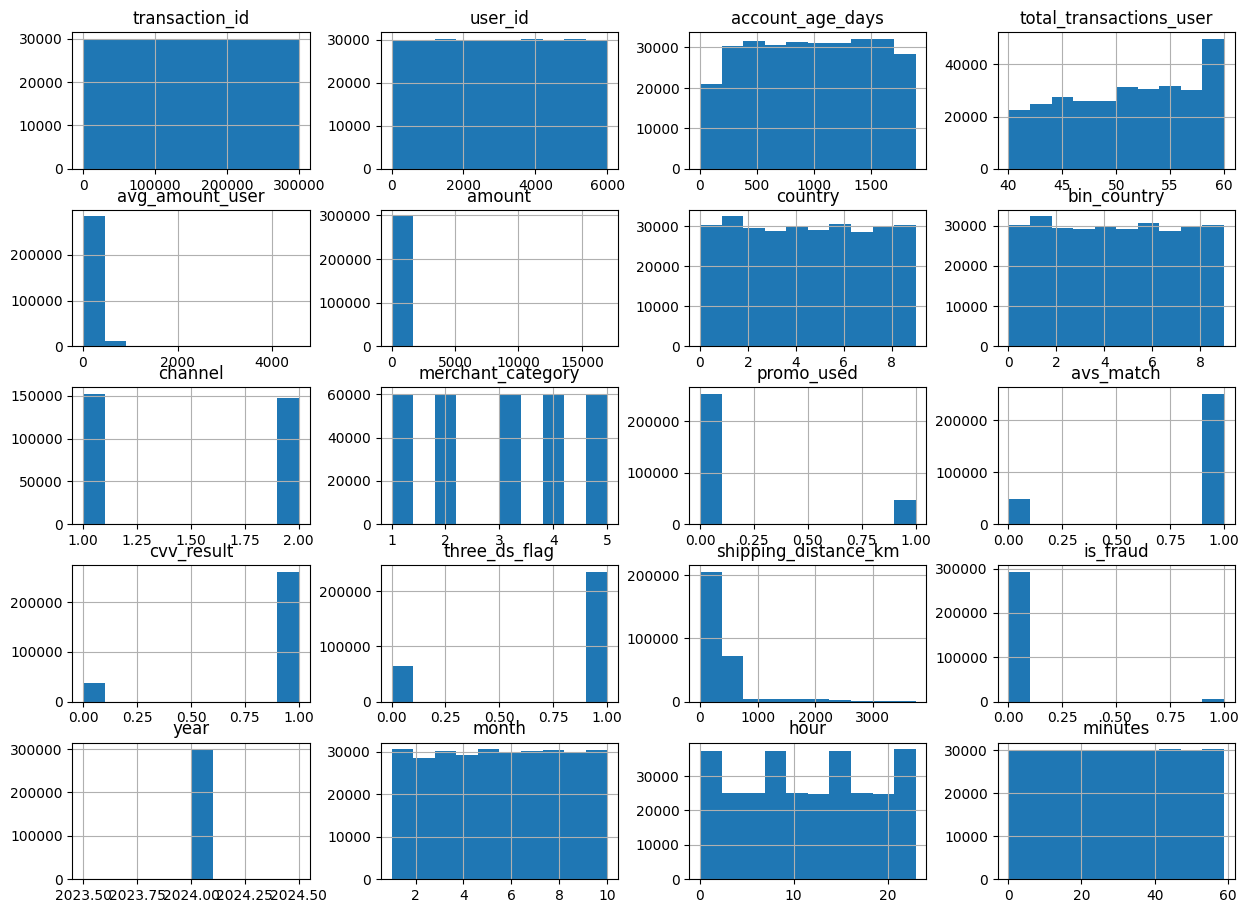

In [27]:
df.hist(figsize=(15,11))

In [28]:
df['shipping_distance_km'] = np.log(df['shipping_distance_km']+1)

In [29]:
df['avg_amount_user'] = np.log(df['avg_amount_user']+1) 

array([[<Axes: title={'center': 'transaction_id'}>,
        <Axes: title={'center': 'user_id'}>,
        <Axes: title={'center': 'account_age_days'}>,
        <Axes: title={'center': 'total_transactions_user'}>],
       [<Axes: title={'center': 'avg_amount_user'}>,
        <Axes: title={'center': 'amount'}>,
        <Axes: title={'center': 'country'}>,
        <Axes: title={'center': 'bin_country'}>],
       [<Axes: title={'center': 'channel'}>,
        <Axes: title={'center': 'merchant_category'}>,
        <Axes: title={'center': 'promo_used'}>,
        <Axes: title={'center': 'avs_match'}>],
       [<Axes: title={'center': 'cvv_result'}>,
        <Axes: title={'center': 'three_ds_flag'}>,
        <Axes: title={'center': 'shipping_distance_km'}>,
        <Axes: title={'center': 'is_fraud'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'hour'}>,
        <Axes: title={'center': 'minutes'}>]], dtype=object)

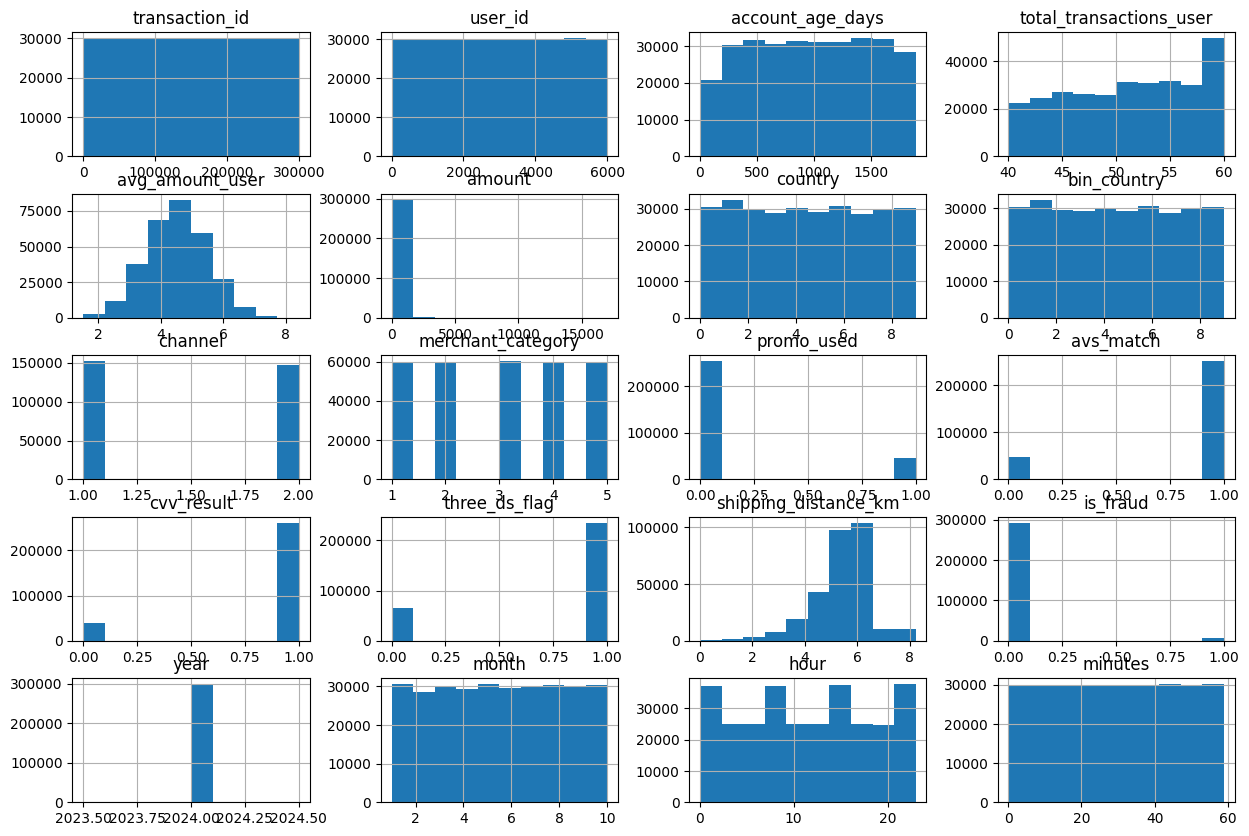

In [30]:
df.hist(figsize=(15,10))

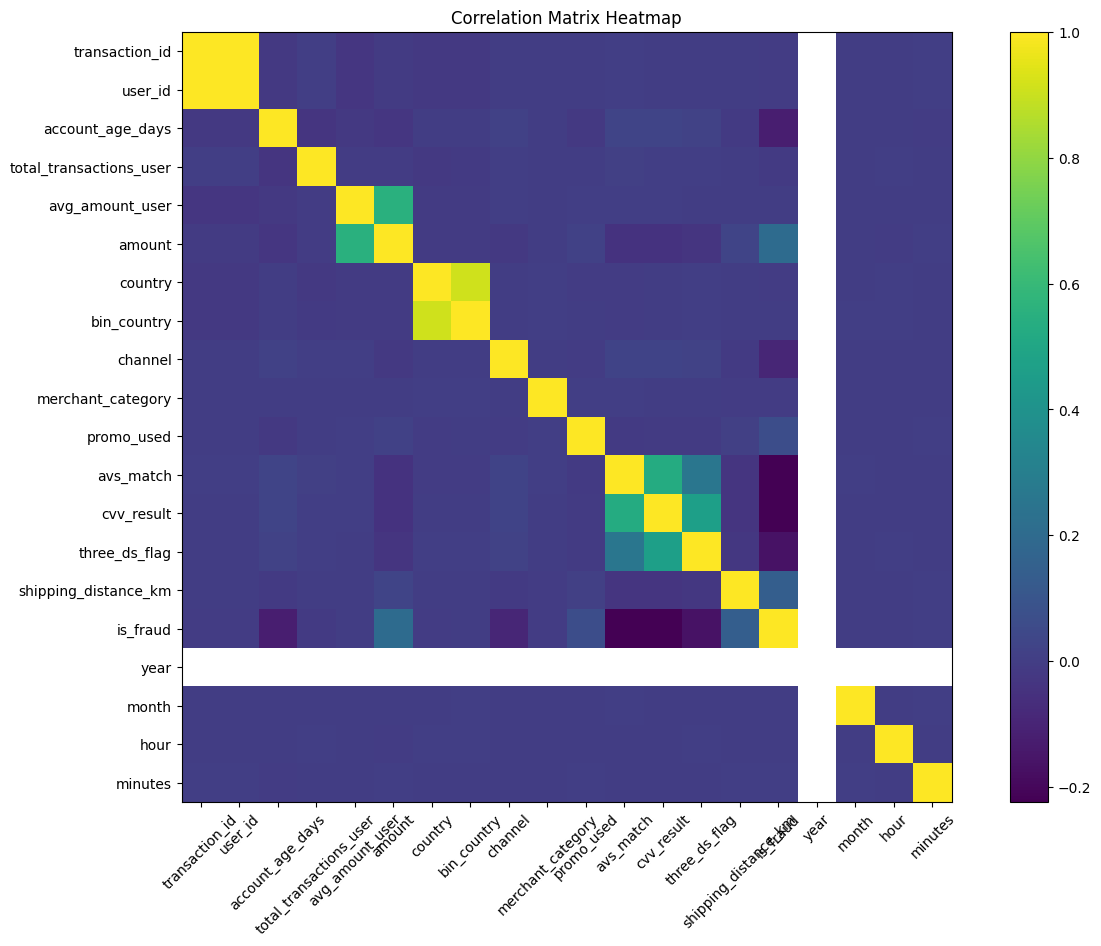

In [31]:
corr_matrix = df.corr()
plt.figure(figsize=(15,10))
plt.imshow(corr_matrix, interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Correlation Matrix Heatmap")
plt.show()


In [32]:
#When oberserving the histogram i can observe many outliers there so i want handle those outliers 

In [33]:
df['promo_used']

0         0
1         0
2         1
3         0
4         0
         ..
299690    0
299691    0
299692    0
299693    0
299694    1
Name: promo_used, Length: 299695, dtype: int64

In [34]:
Q1 = df['promo_used'].quantile(0.25)
Q3 = df['promo_used'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['promo_used'] >= lower_bound) & (df['promo_used'] <= upper_bound)]


In [35]:
Q1 = df['avs_match'].quantile(0.25)
Q3 = df['avs_match'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['avs_match'] >= lower_bound) & (df['avs_match'] <= upper_bound)] 


In [36]:
Q1 = df['cvv_result'].quantile(0.25)
Q3 = df['cvv_result'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['cvv_result'] >= lower_bound) & (df['cvv_result'] <= upper_bound)] 


In [37]:
Q1 = df['three_ds_flag'].quantile(0.25)
Q3 = df['three_ds_flag'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['three_ds_flag'] >= lower_bound) & (df['three_ds_flag'] <= upper_bound)] 


array([[<Axes: title={'center': 'transaction_id'}>,
        <Axes: title={'center': 'user_id'}>,
        <Axes: title={'center': 'account_age_days'}>,
        <Axes: title={'center': 'total_transactions_user'}>],
       [<Axes: title={'center': 'avg_amount_user'}>,
        <Axes: title={'center': 'amount'}>,
        <Axes: title={'center': 'country'}>,
        <Axes: title={'center': 'bin_country'}>],
       [<Axes: title={'center': 'channel'}>,
        <Axes: title={'center': 'merchant_category'}>,
        <Axes: title={'center': 'promo_used'}>,
        <Axes: title={'center': 'avs_match'}>],
       [<Axes: title={'center': 'cvv_result'}>,
        <Axes: title={'center': 'three_ds_flag'}>,
        <Axes: title={'center': 'shipping_distance_km'}>,
        <Axes: title={'center': 'is_fraud'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'hour'}>,
        <Axes: title={'center': 'minutes'}>]], dtype=object)

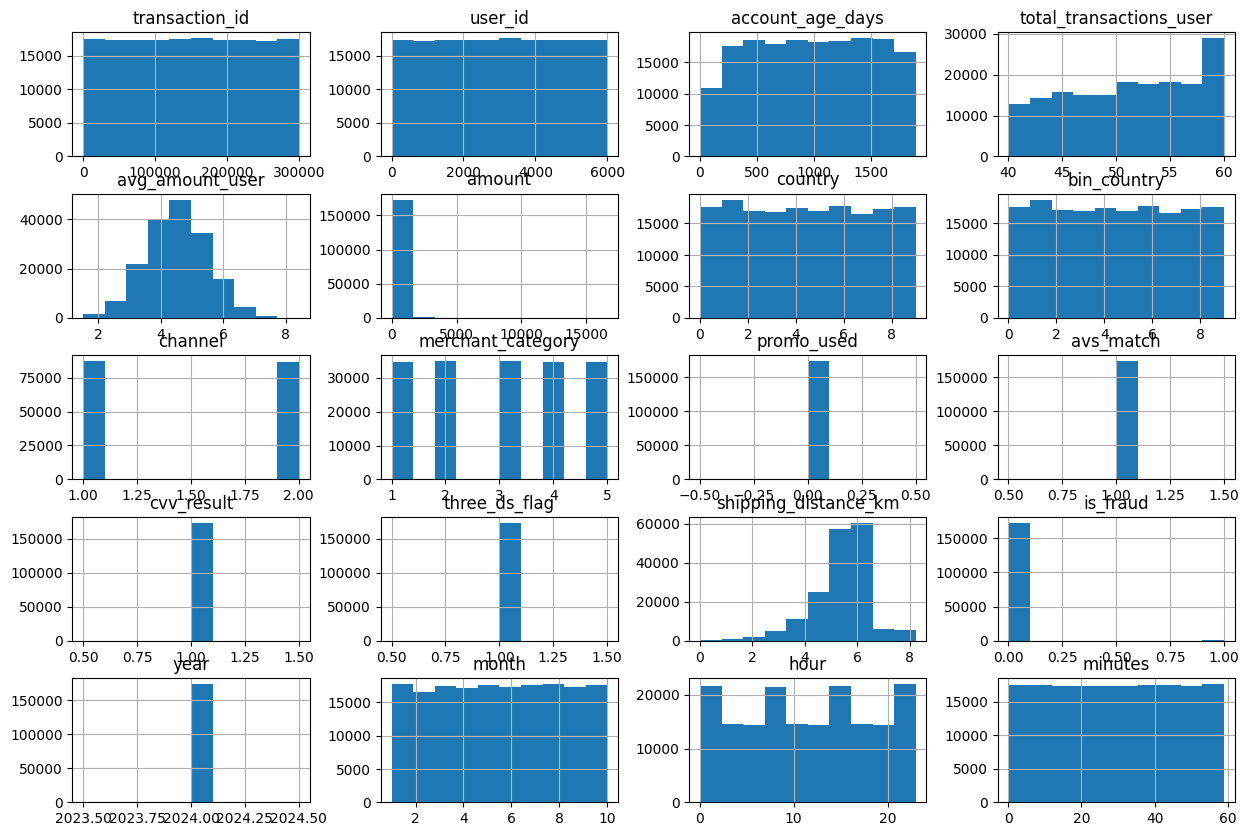

In [38]:
df.hist(figsize=(15,10)) 

In [59]:
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']


In [60]:
X

,transaction_id,user_id,account_age_days,total_transactions_user,avg_amount_user,amount,country,bin_country,channel,merchant_category,promo_used,avs_match,cvv_result,three_ds_flag,shipping_distance_km,year,month,hour,minutes
0,1,1,141,47,5.003476,84.75,0,0,1,1,0,1,1,1,5.918759,2024,1,4,9
3,4,1,141,47,5.003476,112.47,0,0,1,2,0,1,1,1,5.987457,2024,1,17,0
4,5,1,141,47,5.003476,132.91,0,1,1,3,0,1,1,1,6.841915,2024,1,1,27
5,6,1,141,47,5.003476,224.82,0,0,1,1,0,1,1,1,5.670088,2024,1,22,5
6,7,1,141,47,5.003476,125.98,0,0,2,3,0,1,1,1,6.097512,2024,1,0,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299685,299686,6000,996,45,3.364879,14.77,3,3,1,5,0,1,1,1,5.518777,2024,7,17,38
299686,299687,6000,996,45,3.364879,22.82,3,3,1,2,0,1,1,1,5.804593,2024,7,19,1
299689,299690,6000,996,45,3.364879,100.16,3,3,2,1,0,1,1,1,6.052419,2024,9,21,39
299691,299692,6000,996,45,3.364879,68.56,3,3,2,1,0,1,1,1,5.228699,2024,10,8,49


In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42) 

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    class_weight='balanced'   # <<< THIS FIXES IMBALANCE
)

model1.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=300,
                       random_state=42)

In [76]:
model1.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=300,
                       random_state=42)

In [77]:
model1.score(X_train,y_train)

1.0

In [78]:
model1.score(X_test,y_test)

0.9960440556272002

In [79]:
from sklearn.metrics import confusion_matrix,classification_report

In [80]:
y_pred1 = model1.predict(X_test)

In [81]:
y_pred1

array([0, 0, 0, ..., 0, 0, 0], shape=(57382,))

In [82]:
confusion_matrix(y_pred1,y_test)

array([[57107,   221],
       [    6,    48]])

In [83]:
classification_report(y_pred1,y_test)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     57328\n           1       0.18      0.89      0.30        54\n\n    accuracy                           1.00     57382\n   macro avg       0.59      0.94      0.65     57382\nweighted avg       1.00      1.00      1.00     57382\n'

In [85]:
y.value_counts()

is_fraud
0    173064
1       819
Name: count, dtype: int64

In [90]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier

pipeline = Pipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('model', DecisionTreeClassifier(random_state=42))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)


In [91]:
pipeline.score(X_train,y_train)

1.0

In [92]:
pipeline.score(X_test,y_test)

0.9767522916594054

In [93]:
confusion_matrix(y_pred,y_test)

array([[55917,   138],
       [ 1196,   131]])